In [31]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
from matplotlib import pyplot as plt 
import seaborn as sns 

pd.options.display.float_format = '{:,.2f}'.format 
pd.options.display.max_rows = None
pd.options.display.max_columns = None
sns.set()

In [32]:
df =pd.read_csv('houses_Madrid_Cleaned.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21177 entries, 0 to 21176
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 21177 non-null  int64 
 1   sq_mt_built        21177 non-null  int64 
 2   n_rooms            21177 non-null  int64 
 3   n_bathrooms        21177 non-null  int64 
 4   buy_price          21177 non-null  int64 
 5   buy_price_by_area  21177 non-null  int64 
 6   district           21177 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.1+ MB


In [33]:
df['sq_mt_built'] = df['sq_mt_built'].astype('float64')
df['id'] = df['id'].astype('object')


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21177 entries, 0 to 21176
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  object 
 1   sq_mt_built        21177 non-null  float64
 2   n_rooms            21177 non-null  int64  
 3   n_bathrooms        21177 non-null  int64  
 4   buy_price          21177 non-null  int64  
 5   buy_price_by_area  21177 non-null  int64  
 6   district           21177 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 1.1+ MB


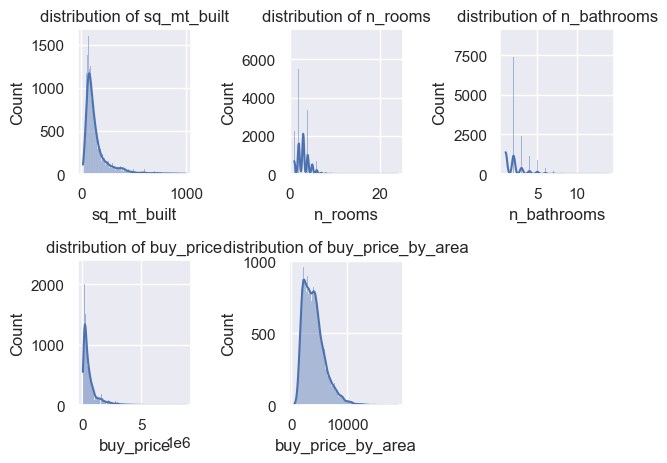

In [35]:
#numerical columns 
plt.Figure(figsize=(40,8))
for e,i in enumerate(df.columns[1:6]):
    plt.subplot(2,3,e+1)
    plt.title('distribution of '+i)
    sns.histplot(df[i],kde=True)
    plt.tight_layout();

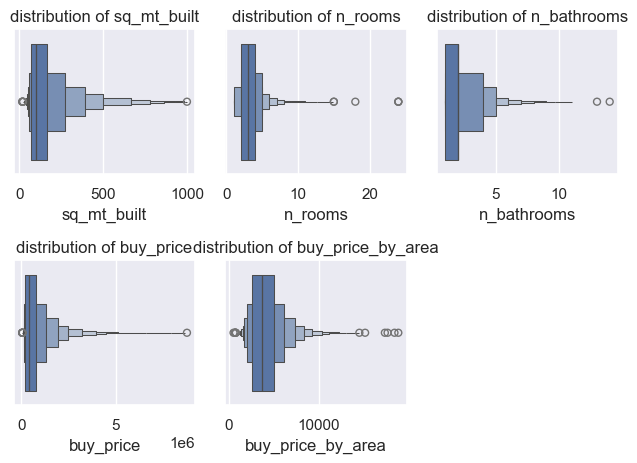

In [36]:
plt.Figure(figsize=(40,8))
for e,i in enumerate(df.columns[1:6]):
    plt.subplot(2,3,e+1)
    plt.title('distribution of '+i)
    sns.boxenplot(x=df[i])
    plt.tight_layout();

In [37]:
px.bar(df.district.value_counts(),title='distribution of district in madrid')

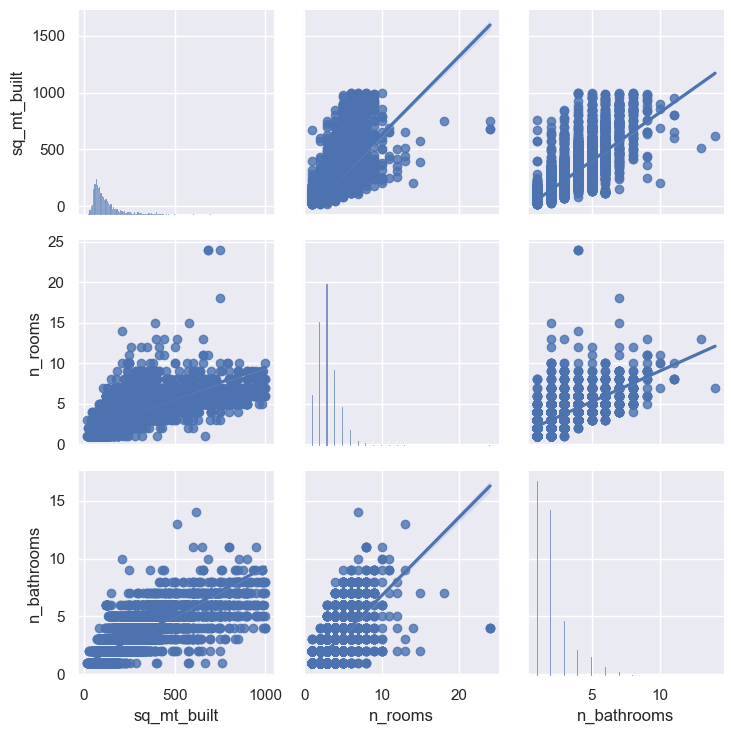

In [38]:
corr = df[['sq_mt_built','n_rooms','n_bathrooms']] 
sns.pairplot(corr,kind= 'reg')
plt.tight_layout();

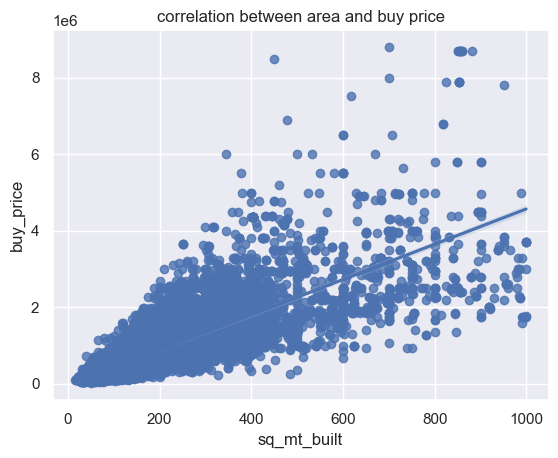

In [39]:
sns.regplot(data=df , x='sq_mt_built',y='buy_price')
plt.title("correlation between area and buy price")
plt.xlabel=('area (m2)')
plt.ylabl=('buy price')

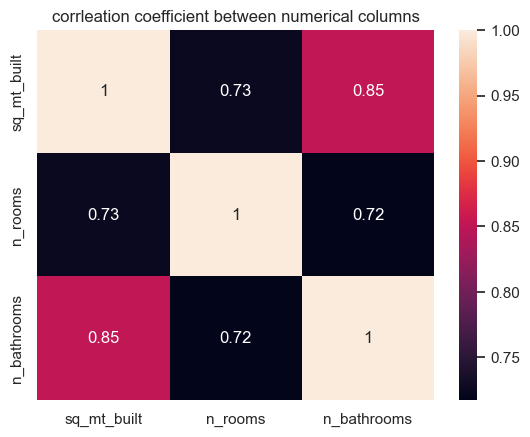

In [40]:
sns.heatmap(corr.corr(),annot=True)
plt.title('corrleation coefficient between numerical columns');

<Axes: title={'center': 'mean price by district'}, xlabel='district', ylabel='price'>

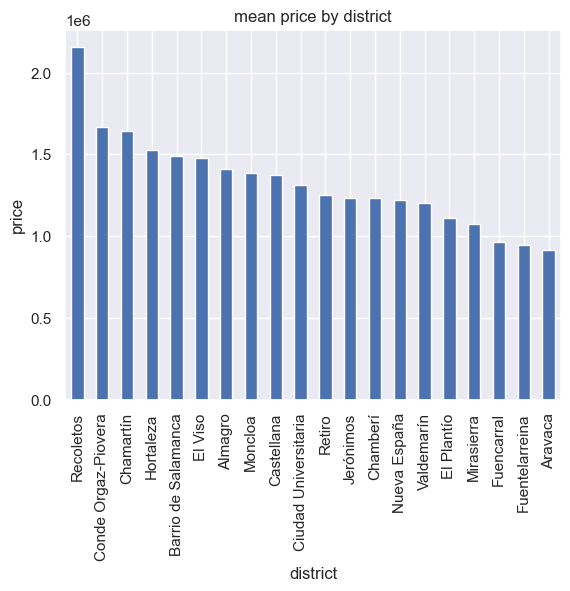

In [41]:
#locationor size : what influences house prices in madrid ?
# which is the most expensive discrit ?

mean_price = df.groupby('district')['buy_price'].mean().sort_values(ascending=False)
mean_price.head(20).plot(kind='bar',xlabel='district',ylabel='price',title='mean price by district' )

<Axes: title={'center': 'mean price by district'}, xlabel='district', ylabel='price'>

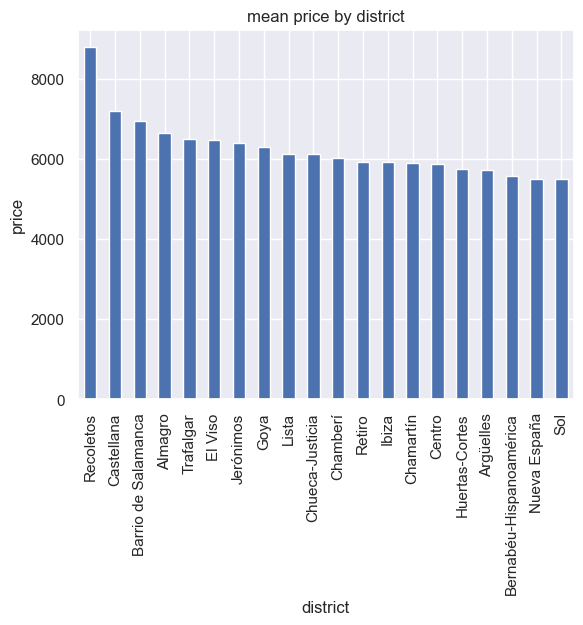

In [42]:
mean_price = df.groupby('district')['buy_price_by_area'].mean().sort_values(ascending=False)
mean_price.head(20).plot(kind='bar',xlabel='district',ylabel='price',title='mean price by district' )

In [43]:
 reco = df.query('district == "Recoletos"')
 reco['intercept'] = 1


C:\Users\Abdeen\AppData\Local\Temp\ipykernel_15972\1187073714.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
reco.sample(10)

,id,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,district,intercept
19526,1681,247.00,4,2,1700000,6883,Recoletos,1
19522,1685,76.00,1,1,490000,6447,Recoletos,1
18698,2518,84.00,2,2,730000,8690,Recoletos,1
19579,1628,391.00,5,4,2290000,5857,Recoletos,1
19235,1976,134.00,2,3,1025000,7649,Recoletos,1
19207,2004,133.00,2,3,1390000,10451,Recoletos,1
19168,2043,410.00,5,3,3300000,8049,Recoletos,1
18596,2620,92.00,2,1,378000,4109,Recoletos,1
18756,2459,138.00,3,2,1350000,9783,Recoletos,1
18686,2530,60.00,1,1,620000,10333,Recoletos,1


In [45]:
import statsmodels.api as sm
lm = sm.OLS(reco['buy_price'], reco[['intercept', 'sq_mt_built']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     555.1
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           5.30e-45
Time:                        15:54:10   Log-Likelihood:                -1654.1
No. Observations:                 113   AIC:                             3312.
Df Residuals:                     111   BIC:                             3318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept   -4.342e+04   1.07e+05     -0.406      0.686   -2.55e+05    1.69e+05
sq_mt_built  8975.6204    380.945     23.561      0.000    8220.753    9730.488
==============================================================================
Omnibus:                       11.498   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               16.048
Skew:                           0.512   Prob(JB):                     0.000328
Kurtosis:                       4.536   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
x = 300
# yhat = intercept(coef) + slope(sq_mt_built per unit ) 
price = -434200 + 8975*x
print("predicted price of flat in recoletos with are of {} m2 = {} euro" .format(x,price)) 

predicted price of flat in recoletos with are of 300 m2 = 2258300 euro


Text(0.5, 1.0, 'corrleation cofficient between numerical columns ')

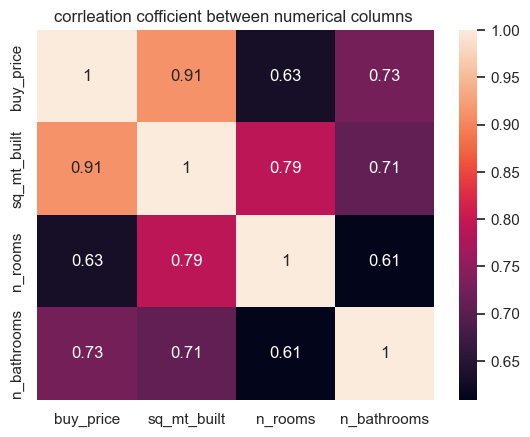

In [47]:
corr = reco[['buy_price','sq_mt_built' , 'n_rooms','n_bathrooms']]
sns.heatmap(corr.corr(),annot=True)
plt.title('corrleation cofficient between numerical columns ')

In [48]:
lm = sm.OLS(reco.buy_price,reco[['intercept','sq_mt_built','n_rooms','n_bathrooms']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     245.2
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           2.69e-48
Time:                        15:54:11   Log-Likelihood:                -1639.7
No. Observations:                 113   AIC:                             3287.
Df Residuals:                     109   BIC:                             3298.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    1.068e+05   1.29e+05      0.828      0.409   -1.49e+05    3.62e+05
sq_mt_built  9686.1051    622.560     15.559      0.000    8452.212    1.09e+04
n_rooms     -2.292e+05   5.01e+04     -4.573      0.000   -3.29e+05    -1.3e+05
n_bathrooms  1.679e+05   4.41e+04      3.804      0.000    8.04e+04    2.55e+05
==============================================================================
Omnibus:                       13.677   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.442
Skew:                           0.517   Prob(JB):                     8.12e-06
Kurtosis:                       4.977   Cond. No.                         804.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Price=(coefficients[0]×Bathrooms)+(coefficients[1]×Rooms)+(coefficients[2]×Area)+intercept
x=300
y=5
z=3
buy_price_new  = (106800) + (9686*x ) + (-229200*y) + (167900*z)
print("predicted price of flat in recoletos with are of {} m2 ,{} rooms ,{} bathrooms = {} euro" .format(x,y,z,price))

predicted price of flat in recoletos with are of 300 m2 ,5 rooms ,3 bathrooms = 2258300 euro


In [53]:
df.head()

,id,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,district
0,21742,64.00,2,1,85000,1328,San Cristóbal
1,21741,70.00,3,1,129900,1856,Los Ángeles
2,21740,94.00,2,2,144247,1535,San Andrés
3,21739,64.00,2,1,109900,1717,San Andrés
4,21738,108.00,2,2,260000,2407,Los Rosales


In [50]:
df.district.nunique()

146

In [55]:
df_dummy = df.query('district in ("Recoletos","Castellana","Trafalgar")')
df_dummy.head()

,id,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,district
10604,10805,68.00,2,1,510000,7500,Trafalgar
10667,10742,103.00,2,2,980000,9515,Trafalgar
10668,10741,103.00,2,2,960000,9320,Trafalgar
10676,10732,95.00,4,1,239000,2516,Trafalgar
10708,10700,67.00,2,2,550000,8209,Trafalgar


In [57]:
# to convert the text into numbers to use it in the prediction 
pd.get_dummies(df_dummy.district).head()

,Castellana,Recoletos,Trafalgar
10604,False,False,True
10667,False,False,True
10668,False,False,True
10676,False,False,True
10708,False,False,True


In [59]:
df_dummy[['Cast','Reco','Traf']] = pd.get_dummies(df_dummy['district'],dtype='int')
df_dummy.head()

C:\Users\Abdeen\AppData\Local\Temp\ipykernel_15972\1864336175.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Abdeen\AppData\Local\Temp\ipykernel_15972\1864336175.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Abdeen\AppData\Local\Temp\ipykernel_15972\1864336175.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,id,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,district,Cast,Reco,Traf
10604,10805,68.00,2,1,510000,7500,Trafalgar,0,0,1
10667,10742,103.00,2,2,980000,9515,Trafalgar,0,0,1
10668,10741,103.00,2,2,960000,9320,Trafalgar,0,0,1
10676,10732,95.00,4,1,239000,2516,Trafalgar,0,0,1
10708,10700,67.00,2,2,550000,8209,Trafalgar,0,0,1


In [60]:
 df_dummy['intercept'] = 1
 lm = sm.OLS(df_dummy.buy_price , df_dummy[['intercept','Cast','Traf']]) 
 result = lm.fit()
 result.summary()

C:\Users\Abdeen\AppData\Local\Temp\ipykernel_15972\933561293.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     114.3
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           5.20e-40
Time:                        16:11:00   Log-Likelihood:                -6095.1
No. Observations:                 404   AIC:                         1.220e+04
Df Residuals:                     401   BIC:                         1.221e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.155e+06   8.15e+04     26.448      0.000    1.99e+06    2.32e+06
Cast       -7.785e+05   1.27e+05     -6.129      0.000   -1.03e+06   -5.29e+05
Traf       -1.513e+06   1.01e+05    -14.998      0.000   -1.71e+06   -1.31e+06
==============================================================================
Omnibus:                      158.066   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              761.523
Skew:                           1.636   Prob(JB):                    4.34e-166
Kurtosis:                       8.876   Cond. No.                         4.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
 df_dummy['intercept'] = 1
 lm = sm.OLS(df_dummy.buy_price , df_dummy[['intercept','Cast','Traf','sq_mt_built']]) 
 result = lm.fit()
 result.summary()

C:\Users\Abdeen\AppData\Local\Temp\ipykernel_15972\755129476.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     859.3
Date:                Wed, 12 Jun 2024   Prob (F-statistic):          6.30e-174
Time:                        16:12:53   Log-Likelihood:                -5780.8
No. Observations:                 404   AIC:                         1.157e+04
Df Residuals:                     400   BIC:                         1.159e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    2.774e+05   6.13e+04      4.524      0.000    1.57e+05    3.98e+05
Cast        -3.712e+05   5.93e+04     -6.254      0.000   -4.88e+05   -2.55e+05
Traf        -4.262e+05   5.42e+04     -7.859      0.000   -5.33e+05    -3.2e+05
sq_mt_built  7665.9496    198.152     38.687      0.000    7276.400    8055.500
==============================================================================
Omnibus:                      119.712   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.118
Skew:                           1.112   Prob(JB):                    5.75e-158
Kurtosis:                       9.170   Cond. No.                         881.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""